In [1]:
execfile(r'D:\measuring\analysis\scripts\setup_analysis.py')

from analysis.scripts.QEC import carbon_ramsey_analysis as cr
import sys
import os
%matplotlib inline 

d:\measuring\data
reloaded
d:\measuring\data
reloaded


## Gate calibration

reloaded
reloaded
d:\measuring\data\20160317\091931_AdwinSSRO_SSROCalibration_111no2_SIL2
d:\measuring\data\20160317\102712_Sweep_carbon_Gate__C4_positive_tau2_8.82e-06_part2_
best gate configuration at:  N = 36,
tau = 0_8.82e-06
bloch vector length:  0.829337682935


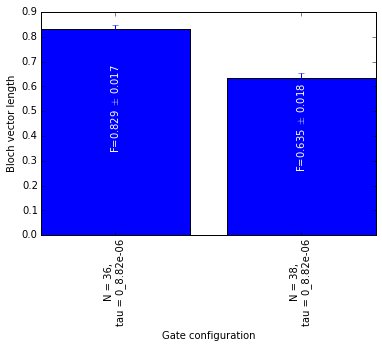

In [8]:
### Gate calibration, Version 3: Try a set of 9 tau,N combinations to find optimum1

from analysis.scripts.QEC import Carbon_gate_calibration_v2 as carbon_calib_v2; reload(carbon_calib_v2)

#carbon_calib_v2.get_gate_fidelity(carbon = 1,older_than='20151214_135000')
#carbon_calib_v2.get_gate_fidelity(carbon = 2)
carbon_calib_v2.get_gate_fidelity(carbon = 3,older_than= None)



# Gate Calibration Multiple Taus

reloaded
reloaded
----------------------------------------
C4: work in progress
d:\measuring\data\20160716\113952_AdwinSSRO_SSROCalibration_111no2_SIL2
Number of parts for carbon 4: 19
parts to be analyzed: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18]
Gate 18: Blochvec. length of: 0.993553 at N = 26,
tau = 6.386e-06
Gate 19: Blochvec. length of: 0.989028 at N = 28,
tau = 6.386e-06
Gate 156: Blochvec. length of: 0.988494 at N = 32,
tau = 6.404e-06
Gate 157: Blochvec. length of: 0.978735 at N = 34,
tau = 6.404e-06
Gate 33: Blochvec. length of: 0.978175 at N = 26,
tau = 6.388e-06


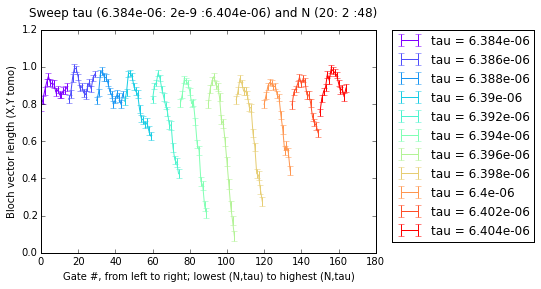

Analysis complete, have a nice day!


In [20]:
sys.path.append(r'D:/measuring/analysis/scripts/purification')
%matplotlib inline 
import Carbon_gate_calibration_vP as ccP
reload(ccP)

'''
Analysis script to analyze gate calibrations

Usage
The function allows 3 types of graphs which can be turned on and off by setting the following keywords to true:
1.) plot_fidelity: Plots fidelity bar graphs
2.) plot_gate_time: Plots gate time (N*tau) vs. fidelity
3.) line_fidelity: Plots a line graph of version one for compactness

To only look at a specific number of taus, specify tau_nrs. Ex: tau_nrs = [0,3]
To only view specific parts specify parts. Ex: parts = [1]

Comparison of different taus is in progress
'''

# gates1, gate_values1, b1, b_u1 = ccP.get_gate_fidelity(carbon = 5, 
#             newer_than='20160128_090000', older_than= None, tau_nrs = [0],
#             plot_fidelity = False, gate_time = False, return_data = True, line_fidelity = False, ssro_tstamp = '180819')
# gates2, gate_values2, b2, b_u2 = ccP.get_gate_fidelity(carbon = 5, 
#             newer_than='20160127_180000', older_than= '20160127_230000', tau_nrs = [2],
#             plot_fidelity = False, gate_time = False, return_data = True, line_fidelity = False, ssro_tstamp = '180819')
# ccP.line_plot_fidelity(gates = [gates1,gates2], gate_values = None, b = [b1,b2],b_u = [b_u1,b_u2])
# ccP.plot_gate_time(gates = [gates1,gates2], gate_values =[gate_values1,gate_values2], b = [b1,b2],b_u = [b_u1,b_u2])
# ccP.bar_plot_fidelity(gates = gates1, gate_values = gate_values1, b = b1, b_u = b_u1)

# See Guide. 
carbons = [4]
for c in carbons:
    print  '-'*40
    print 'C' + str(c) + ': work in progress'
    ccP.gate_sweep_analysis(carbon = c, 
                newer_than= '20160715_000000', older_than= '20160718_000000',tau_nrs=[0],
                plot_fidelity = False, gate_time = False, return_data = False, line_fidelity = True)
#  data with error. Long list. newer_than= '20160305_170000', older_than= '20160305_182000',

In [79]:
### Gate calibration, multiple tau blocks for positive and negative readout
import sys
import os
sys.path.append(r'D:/measuring/analysis/scripts/purification')

%matplotlib inline 
import Carbon_gate_calibration_vP as ccP
reload(ccP)

fig = plt.figure()
# ccP.get_gate_fidelity(carbon = 5, newer_than='20160123_114000', older_than= '20160123_200000', tau_nrs = [0,1,2,3],
#                      plot_fidelity = False, plot_gate_time = True)
# ccP.get_gate_fidelity(carbon = 5, newer_than='20160128_090000', older_than= None, tau_nrs = [0],
#                      plot_fidelity = False, plot_gate_time = False,plot_graph=True)#, ssro_tstamp = '180407')
x1,y1,y1_u=ccP.get_gate_fidelity(carbon = 5, newer_than='20160128_090000', older_than= None, tau_nrs = [2],
                     plot_fidelity = False, plot_gate_time = False,plot_graph = False)#, ssro_tstamp = '180407')
x2,y2,y2_u=ccP.get_gate_fidelity(carbon = 5, newer_than='20160127_180000', older_than= '20160127_230000', tau_nrs = [2],
                      plot_fidelity = False, plot_gate_time = False,plot_graph = False)#, ssro_tstamp = '180407')
plt.errorbar(x1,y1,y1_u)
plt.errorbar(x2,y2,y2_u)


reloaded


AttributeError: 'module' object has no attribute 'get_gate_fidelity'

## Frequency Calibration

reloaded
Converged with chi squared  0.0262409462
degrees of freedom, dof  55
RMS of residuals (i.e. sqrt(chisq/dof))  0.0218428045985
Reduced chisq (i.e. variance of residuals)  0.000477108112727

fitted parameters at minimum, with 68% C.I.:
 0 a              0.491768 +/-   0.002845
 1 A              0.469928 +/-   0.019471
 2 T           -833.888468 +/- 281991098.758511
 3 f          460217.445254 +/- 109.802846
 4 phi         -240.039901 +/-   2.835185

correlation matrix:
               a         A         T         f         phi       
         a  1.000000
         A  0.063051  1.000000
         T -0.049559 -0.978544  1.000000
         f  0.103607  0.060937 -0.058821  1.000000
       phi -0.102151 -0.068042  0.066119 -0.985252  1.000000

fitfunction: a + A * exp(-((x-x0)/T )**n*cos(2pi *(f*x+phi/360) )


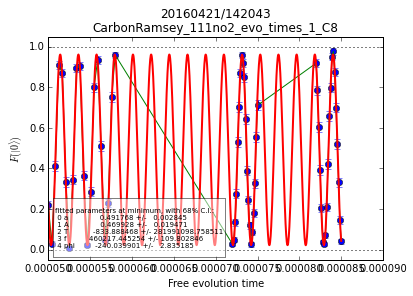

In [12]:
### DD frequency calibration ###
reload(cr)
Result=cr.Carbon_Ramsey_DD_freq(frequency =448e3, offset = 0.5, amplitude = 0.4,exponent=1,carbon= 8,
                        decay_constant =0.01,phase =0, plot_fit = True, show_guess = False,fixed = [2,4])

reloaded
Converged with chi squared  0.0113309544533
degrees of freedom, dof  17
RMS of residuals (i.e. sqrt(chisq/dof))  0.0258171790199
Reduced chisq (i.e. variance of residuals)  0.000666526732547

fitted parameters at minimum, with 68% C.I.:
 0 a              0.496998 +/-   0.005912
 1 A              0.269164 +/-   0.008041
 2 f            497.700549 +/-   5.486795
 3 phi          -37.321284 +/-   3.950320

correlation matrix:
               a         A         f         phi       
         a  1.000000
         A  0.173780  1.000000
         f -0.094432 -0.075054  1.000000
       phi  0.195217  0.102732 -0.894261  1.000000

fitfunction: a + A * exp(-((x-x0)/T )**n*cos(2pi *(f*x+phi/360) )


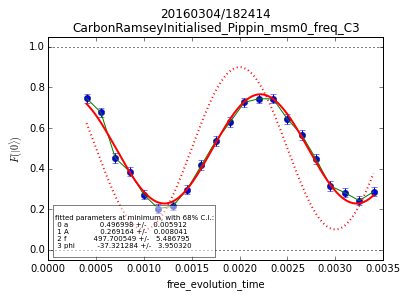

In [14]:
### Single frequency ###
reload(cr)
Result=cr.Carbon_Ramsey(title = 'msm0', frequency =0.5e3, offset = 0.5, amplitude = 0.4,exponent=1,  
                        decay_constant =100,phase =0, plot_fit = True, show_guess = True,fixed = [2,3,4])

In [ ]:
### Phase sweep ###
reload(cr)
Result=cr.Carbon_Ramsey(timestamp='20150421_135423' , 
                        offset = 0.5, amplitude = 0.1, x0=0, decay_constant = 1e5, exponent = 2, 
                        frequency = 1/360., phase =0, 
                        plot_fit = True, show_guess = False,fixed = [0,2,3,4,5])

## Single carbon init

older_than None
d:\measuring\data\20160815\143749_probabablistic_MBE_Tomography_111no2positive_4_MBI
d:\measuring\data\20160815\144004_probabablistic_MBE_Tomography_111no2negative_4_MBI
test
d:\measuring\data\20160815\143749_probabablistic_MBE_Tomography_111no2positive_4_MBI
['X'] [0] [ 0.94660909] [ 0.00553444]


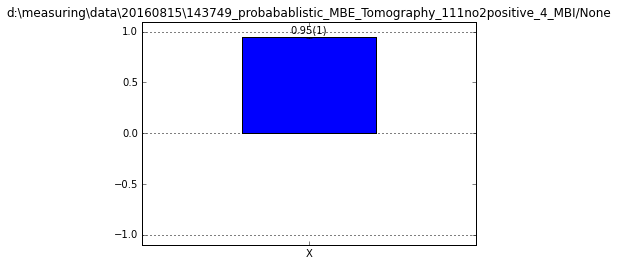

In [3]:
from analysis.scripts.QEC import Two_Qubit_Tomography as Tomo2
reload(Tomo2)
### carbon init
carbons =[4]
init_method ='MBI' ### 'swap' or 'MBI'

for c in carbons:
       Tomo2.BarPlotTomoContrast(tag = '_'+str(c)+'_'+init_method,return_data = True)
        